In [1]:
## To handel dataset
import pandas as pd
import numpy as np

# for plotting

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

pd.set_option('display.max_columns',None)

In [2]:
data=pd.read_csv('train.csv')

print(data.shape)

data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.drop('Id',axis=1,inplace=True)

data.shape

(1460, 80)

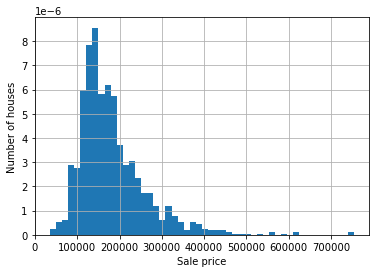

In [4]:
# histogram to evaluate target distribution

data['SalePrice'].hist(bins=50,density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale price')
plt.show()

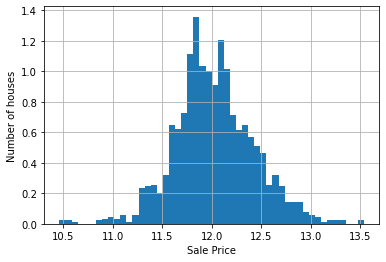

In [5]:
# transforming the data in to logarithims transformation
np.log(data['SalePrice']).hist(bins=50,density=True)
plt.ylabel('Number of houses')
plt.xlabel('Sale Price')
plt.show()


In [6]:
# Identifying the categorical value
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

cat_vars = cat_vars+['MSSubClass']

len(cat_vars)

44

In [7]:
data[cat_vars] = data[cat_vars].astype('O')


In [8]:
num_vars = [var for var in data.columns if var not in cat_vars and  var!='SalePrice']
len(num_vars)

35

In [9]:
## mising values
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]
# display the result with percentage of missing data
data[vars_with_na].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

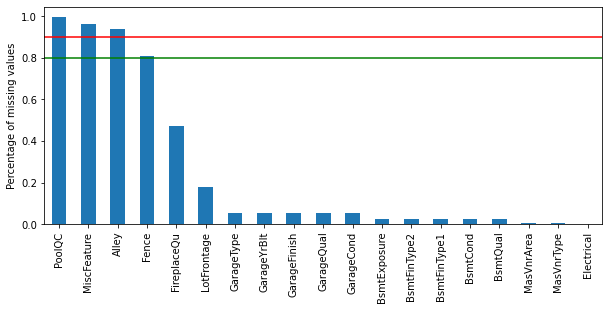

In [12]:
# plot the missing value counts 
data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(10,4))
plt.ylabel('Percentage of missing values')
plt.axhline(y=0.90,color= 'r',linestyle='-')
plt.axhline(y=0.80,color= 'g',linestyle='-')


In [14]:
cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variable with na :',len(cat_na))
print('Number of numerical variable with na :',len(num_na))

Number of categorical variable with na : 16
Number of numerical variable with na : 3


In [15]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
## Relationship between missing data and sale price

def analyse_na_value(df,var):
    df = data.copy()
    
    ## make and intream variable  that indiactes 1 if the observation was missing and 0 otherwise
    df[var] = np.where(df[var].isnull(),1,0)
    
    ## compare the median sale price in the obsearvation  where  data is missing vs the observation where the data is available
    tmp = df.groupby(var)['SalePrice'].agg(['mean','std'])
    
    tmp.plot(kind='barh',y='mean',legend=False,
            xerr = 'std',title = 'SalePrice',color='green')
    plt.show()

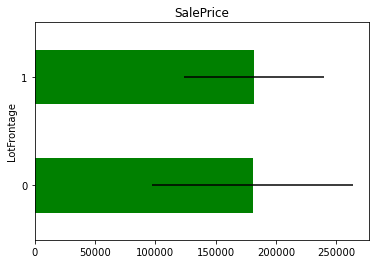

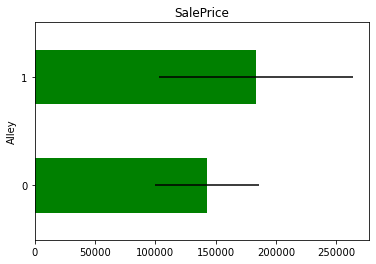

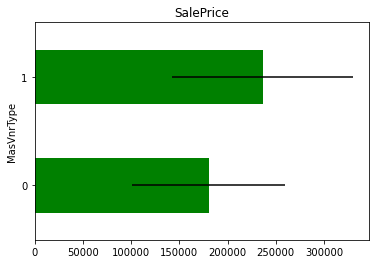

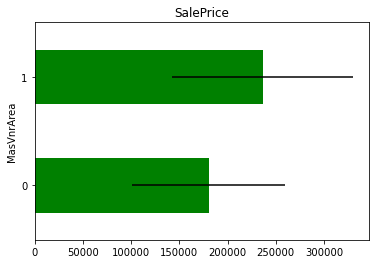

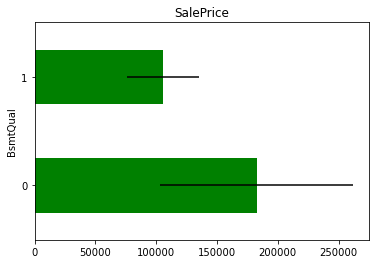

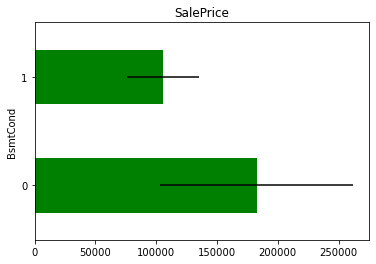

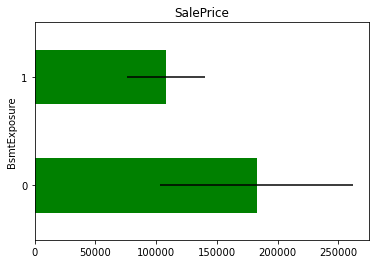

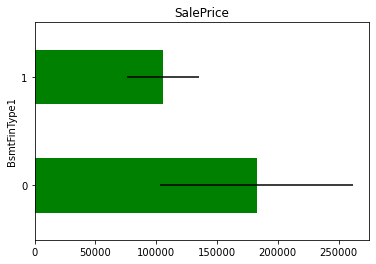

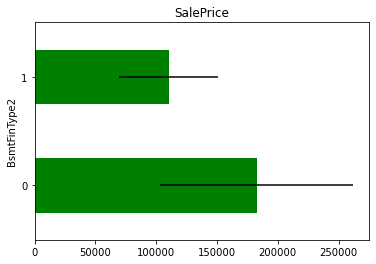

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


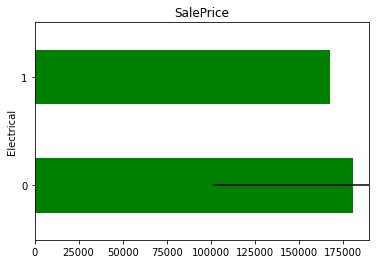

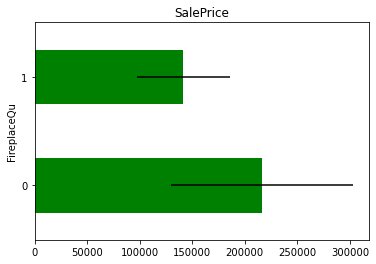

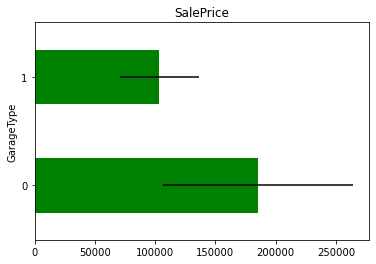

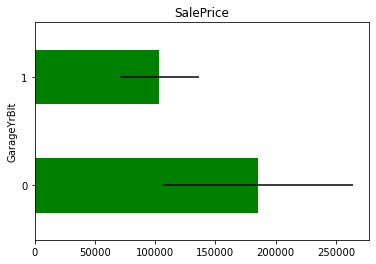

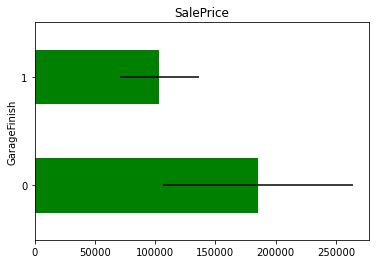

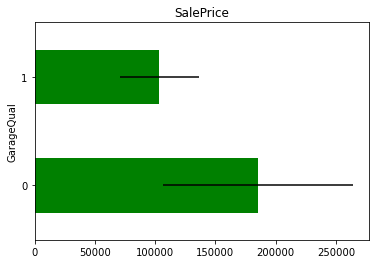

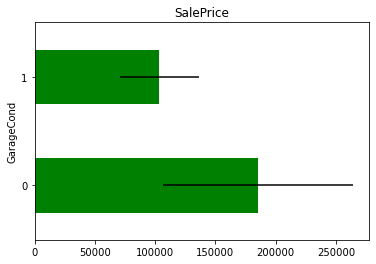

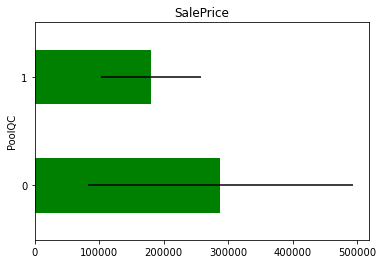

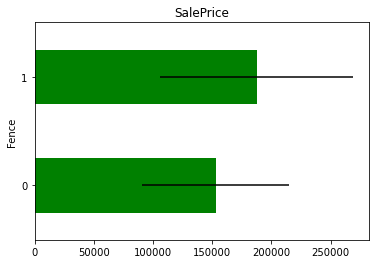

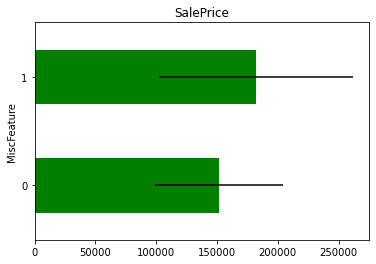

In [18]:
for var in vars_with_na :
    analyse_na_value(data,var)

## we have 4 year variable in the dataset:
## 1. YearBuild
## 2. YearRemodeAdd
## 3. GarageYrBI
## 4. YrSold

In [19]:
## list of variable that contain year information

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [20]:
# explore the unique value in the varibale 
for var in year_vars:
    print(var,data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

### Evolution of the sale price with year in which the house was sold

Text(0, 0.5, 'Median House price')

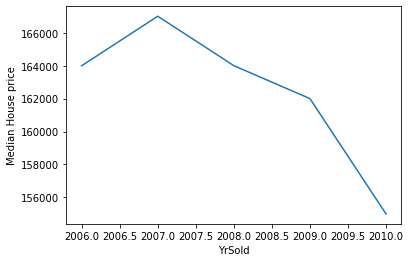

In [21]:
# plot median sale price vs  year in which it was sold
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House price')


There has been is adrop in the value of the house . That is unusual, in real life

## plot the sale vs year in which it was build

Text(0, 0.5, 'median House Price')

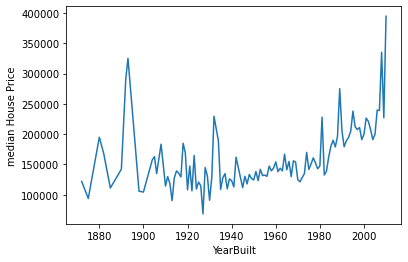

In [23]:
# plot median sale price vs year in which  it was build

data.groupby('YearBuilt')['SalePrice'].median().plot()
plt.ylabel('median House Price')

 Newly house build are more expensive than 

In [24]:
## We will caputured the elapsed  year between the year varibales and the year in which the house was sold

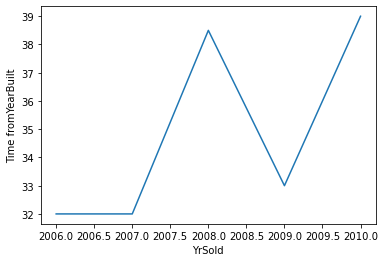

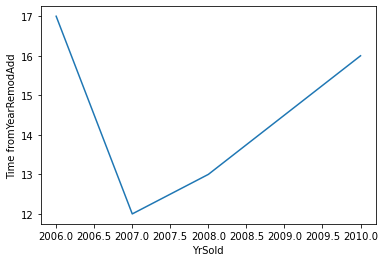

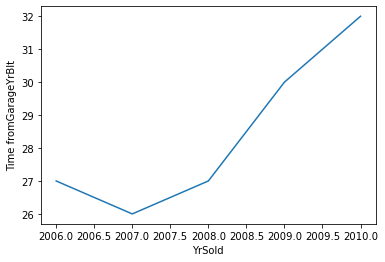

In [25]:
def analyse_year_vars(df,var):
    df = df.copy()
    ## diifrence between the year variable and the year in which the  house was sold
    df[var] = df['YrSold']-df[var]
    
    df.groupby('YrSold')[var].median().plot()
    plt.ylabel('Time from'+ var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data,var)
    
    

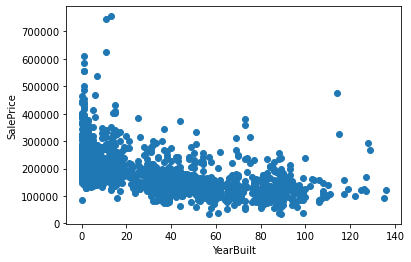

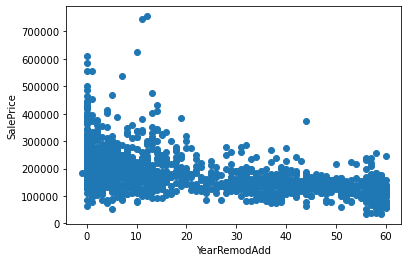

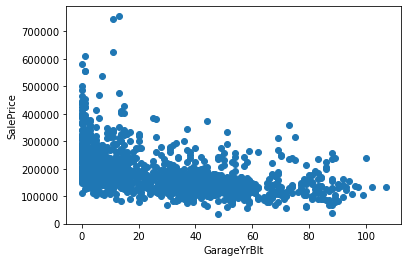

In [26]:
def analyse_year_vars(df,var):
    df = df.copy()
    ## diifrence between the year variable and the year in which the  house was sold
    df[var] = df['YrSold']-df[var]
    
    plt.scatter(df[var],df['SalePrice'])
    plt.ylabel('SalePrice')
    plt.xlabel(var)
    plt.show()
    
    
for var in year_vars:
    if var !='YrSold':
        analyse_year_vars(data,var)
    

In [28]:
## Discrete variables
discrete_vars = [var for var in num_vars if len(data[var].unique())<20 and var not in year_vars]

print('Number of discrete variable:',len(discrete_vars))

Number of discrete variable: 13


In [29]:
data[discrete_vars].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


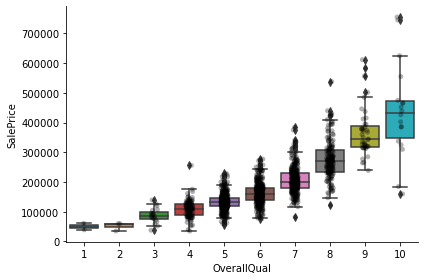

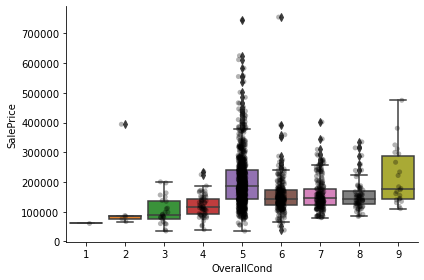

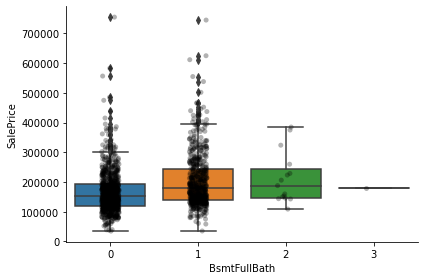

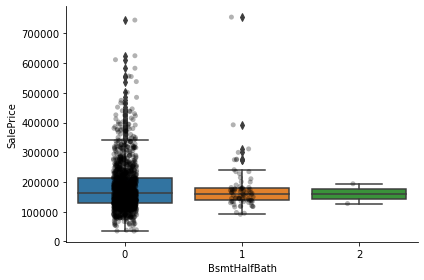

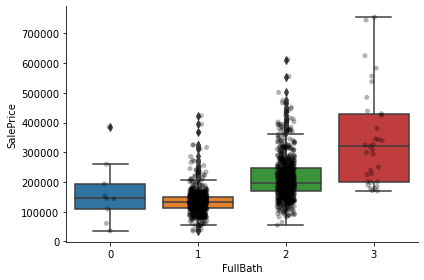

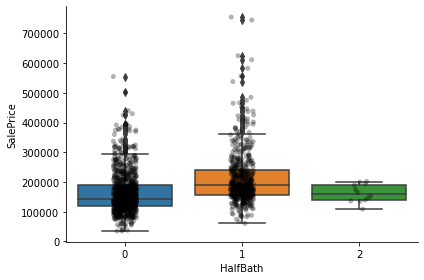

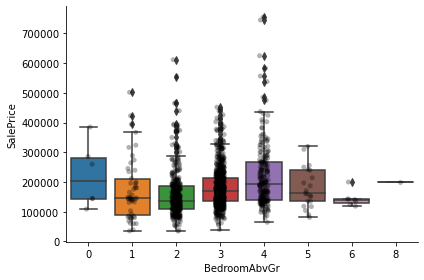

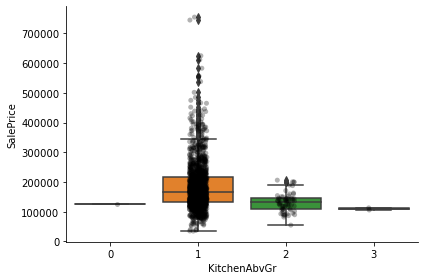

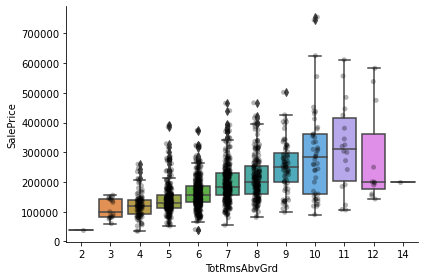

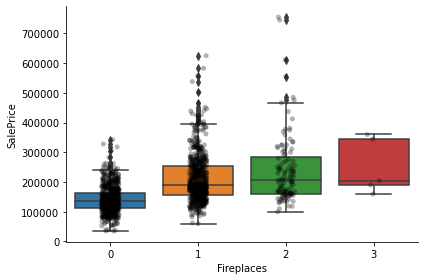

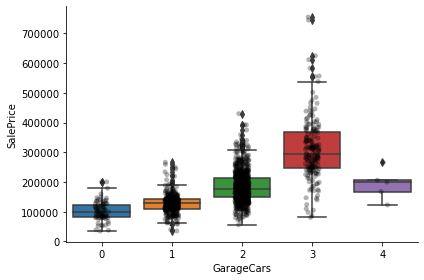

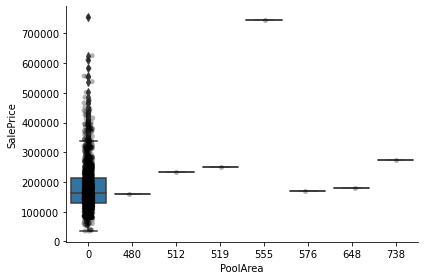

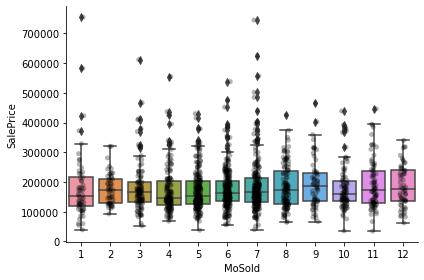

In [30]:
for var in discrete_vars:
    sns.catplot(x=var,y='SalePrice',data=data,kind='box',height=4,aspect=1.5)
    
    sns.stripplot(x=var,y='SalePrice',data=data,alpha=0.3,color='k')
    plt.show()

In [31]:
## contineous varibale

count_vars = [var for var in num_vars if  var not in discrete_vars+year_vars]

print('Number of continuous variable:',len(count_vars))

Number of continuous variable: 18


In [32]:
data[count_vars].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


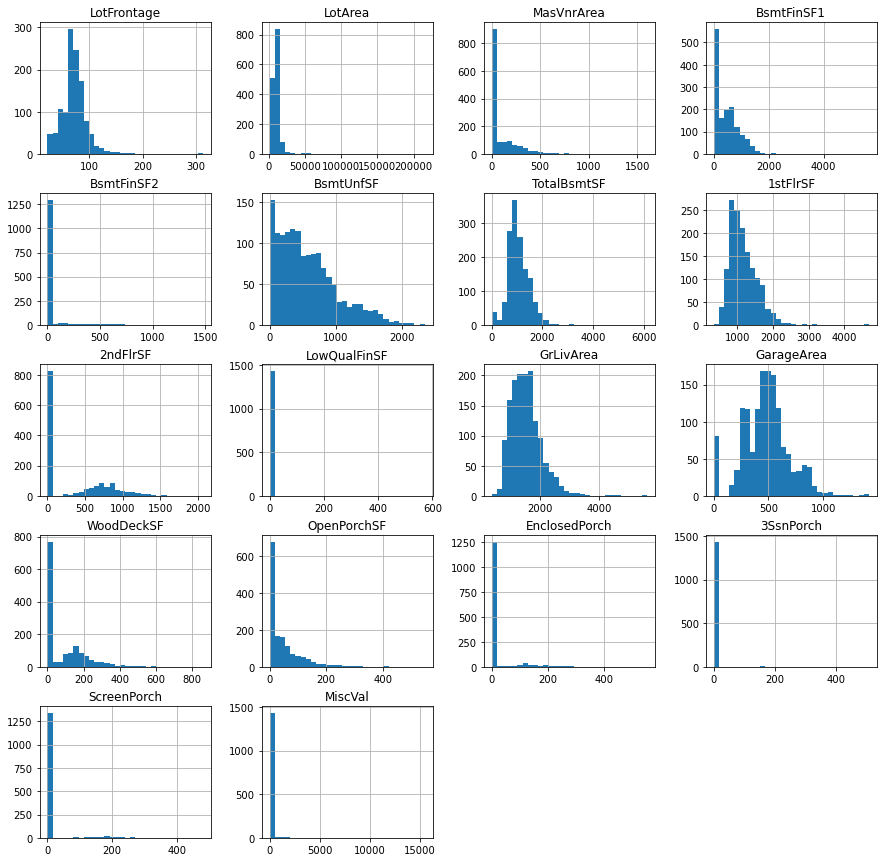

In [33]:
data[count_vars].hist(bins=30,figsize=(15,15))
plt.show()

In [34]:
## list the skiwed variable
skewed = ['BsmtFinSF2','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']

In [39]:
## remaining countinueos value are
cont_vars = [var for var in count_vars if var not in skewed]
cont_vars

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

### Yeo-Johnson transformation

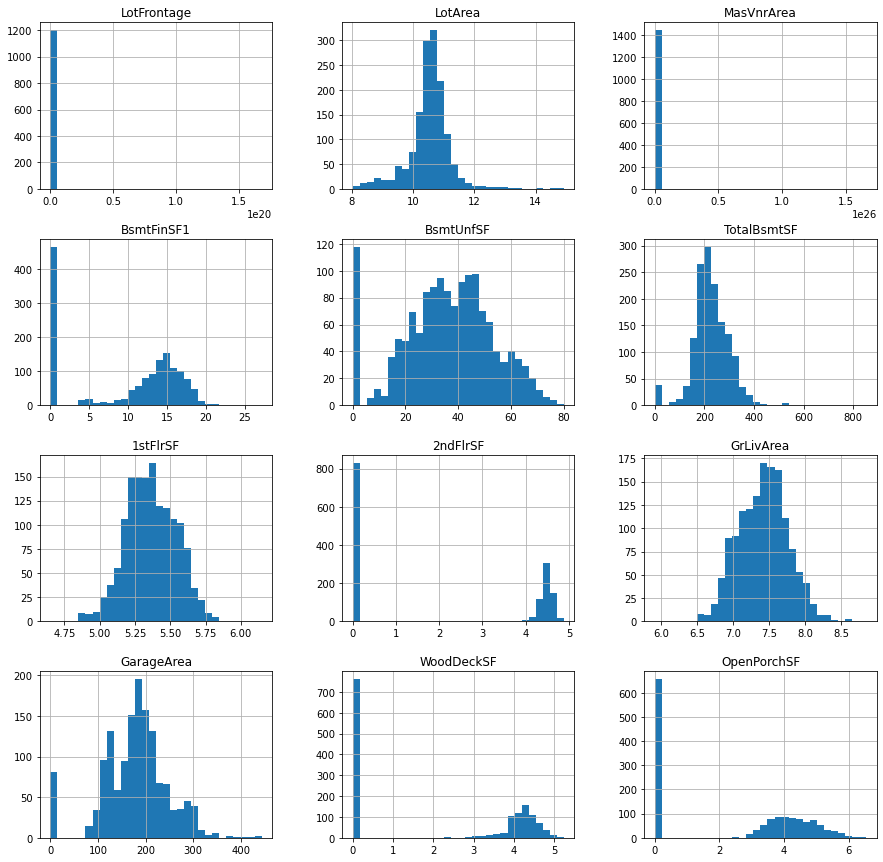

In [41]:
## analysing the distribution of varibales after yeo-johson transformation of the variables

tmp = data.copy()

for var in cont_vars:
    tmp[var],param = stats.yeojohnson(data[var])
    
tmp[cont_vars].hist(bins=30,figsize=(15,15))
plt.show()

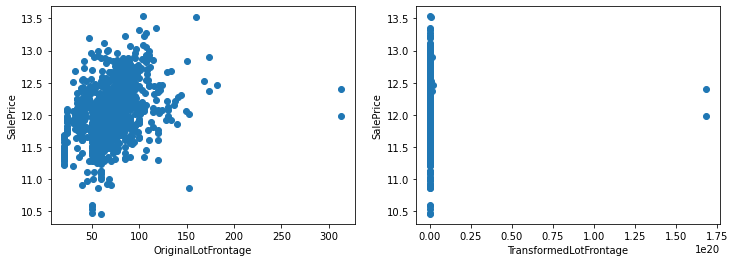

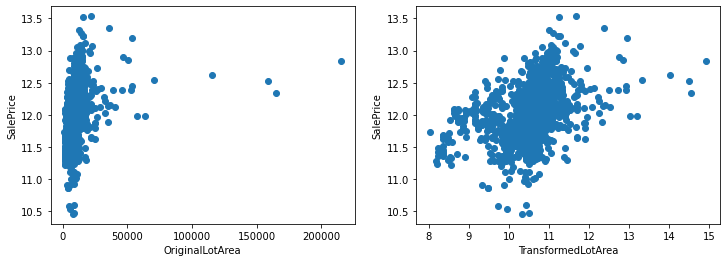

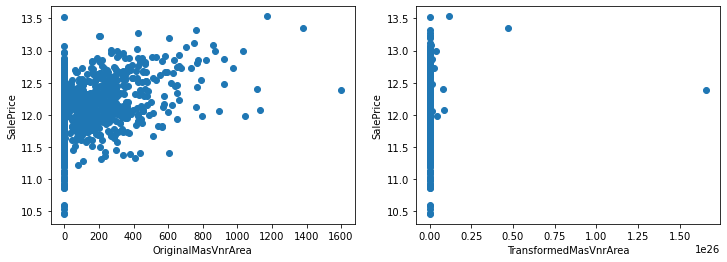

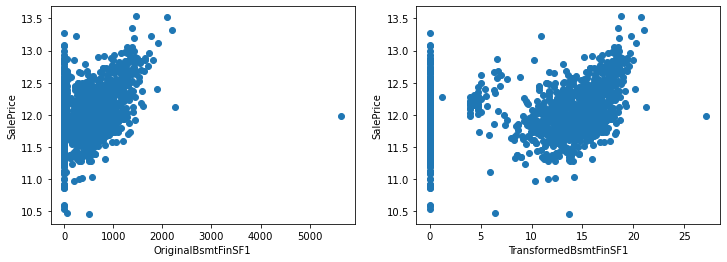

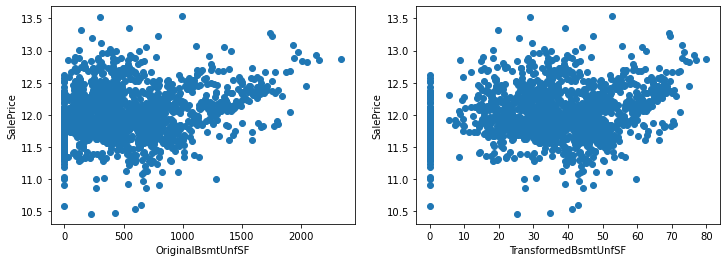

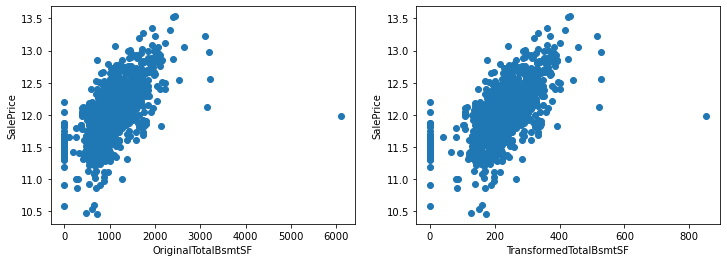

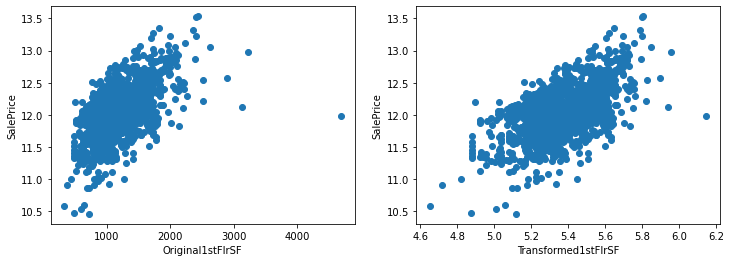

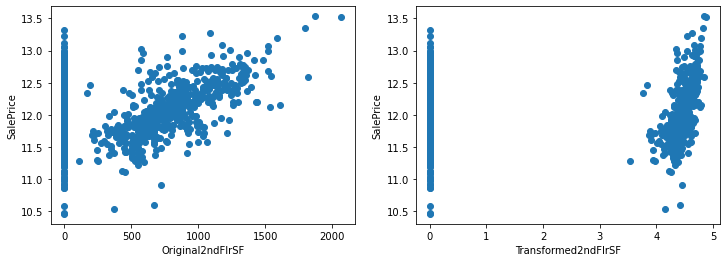

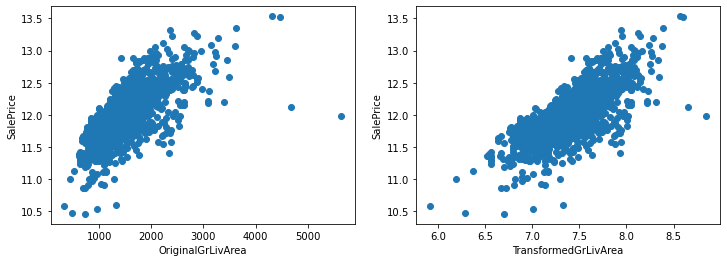

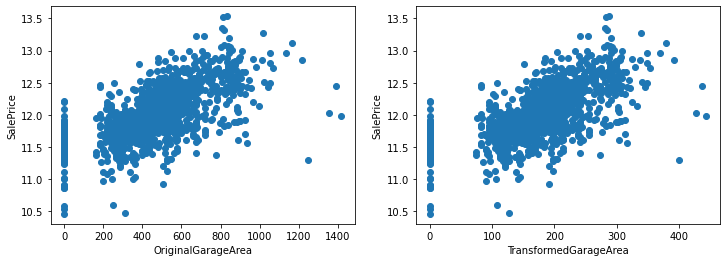

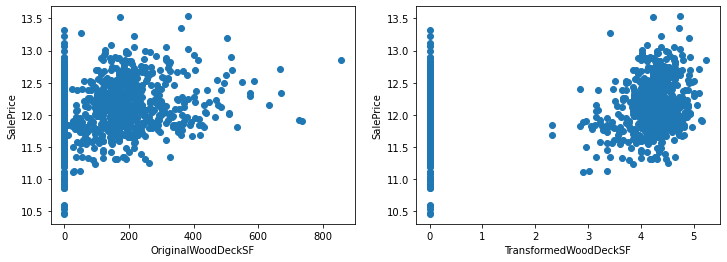

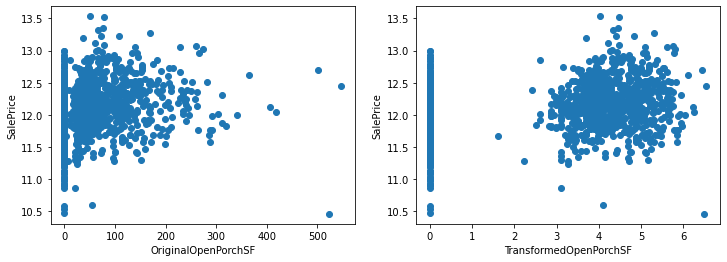

In [43]:
## plotting the original and transformed variables

for var in cont_vars:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.scatter(data[var],np.log(data['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Original'+var)
    
    plt.subplot(1,2,2)
    plt.scatter(tmp[var],np.log(tmp['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Transformed'+var)
    
    plt.show()

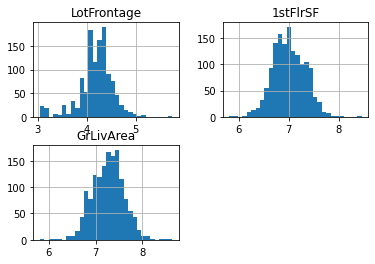

In [46]:
## Logarithim transformation

# logarithims transformation can only applied on +ve value

tmp = data.copy()

for var  in ['LotFrontage','1stFlrSF','GrLivArea']:
    
    tmp[var]=np.log(data[var])
    
tmp[['LotFrontage','1stFlrSF','GrLivArea']].hist(bins=30)
plt.show()

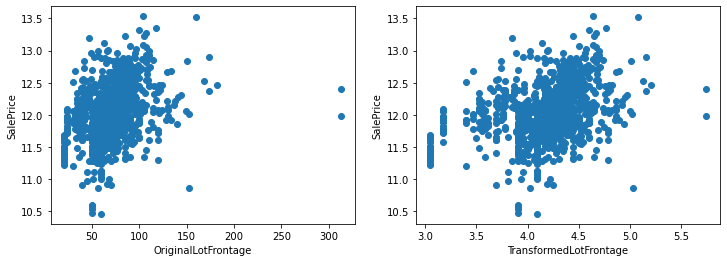

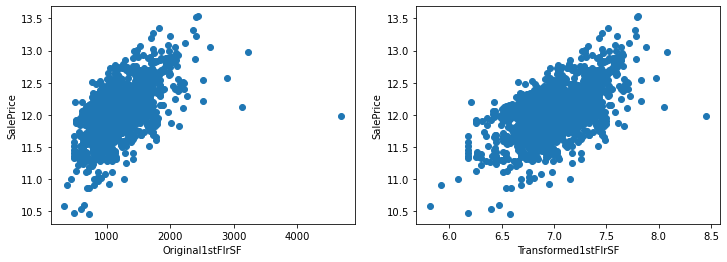

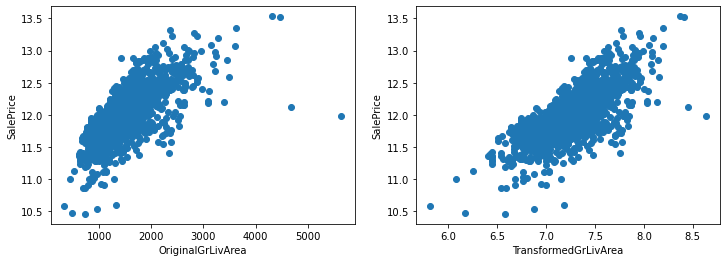

In [47]:
## plotting the original and transformed variables

for var  in ['LotFrontage','1stFlrSF','GrLivArea']:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.scatter(data[var],np.log(data['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Original'+var)
    
    plt.subplot(1,2,2)
    plt.scatter(tmp[var],np.log(tmp['SalePrice']))
    plt.ylabel('SalePrice')
    plt.xlabel('Transformed'+var)
    
    plt.show()

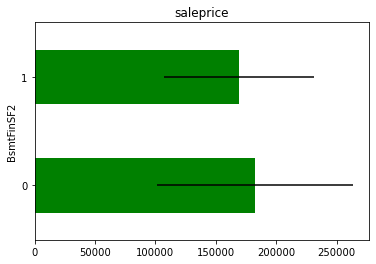

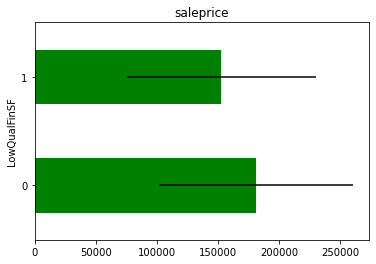

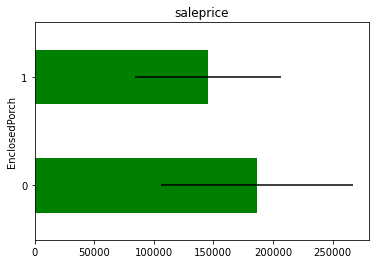

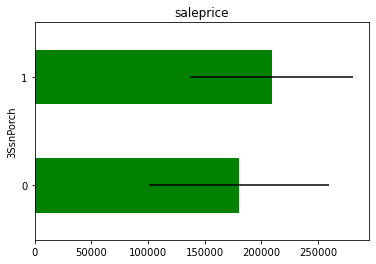

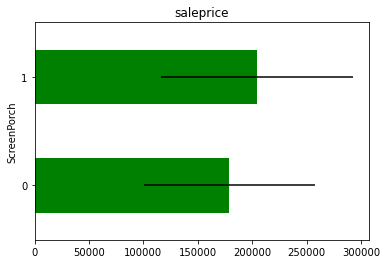

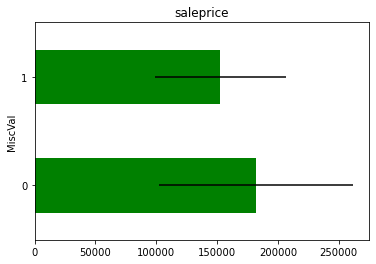

In [48]:
## skewed variables
for  var in skewed:
    tmp = data.copy()
    
    tmp[var]=np.where(data[var]==0,0,1)
    
    tmp = tmp.groupby(var)['SalePrice'].agg(['mean','std'])
    
    tmp.plot(kind='barh',y='mean',legend=False,
            xerr='std',title='saleprice',color='green')
    plt.show()

## analysis on categorical variable

## cardinallity : It is the number of different levels that the variables can take

<AxesSubplot:>

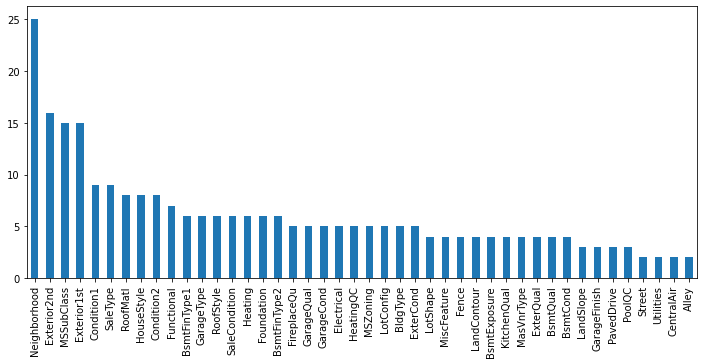

In [51]:
data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [53]:
# re map  string to number ,which determine quality
qual_mappings = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5,'Missing':0,'NA':0}

qual_vars = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']

for var in qual_vars:
    data[var]=data[var].map(qual_mappings)

In [55]:
exposure_mappings = {'No':1 , 'Mn':2 ,'Av':3 ,'Gd':4,'Missing':0,'NA':0}

var = 'BsmtExposure'

data[var] = data[var].map(exposure_mappings)

In [59]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    data[var] = data[var].map(finish_mappings)

In [60]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

data[var] = data[var].map(garage_mappings)


In [61]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

data[var] = data[var].map(fence_mappings)

In [62]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

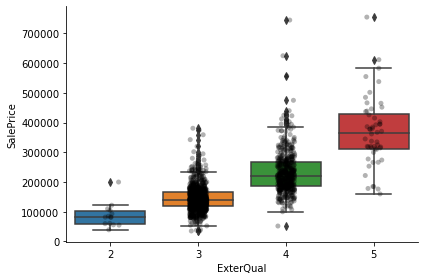

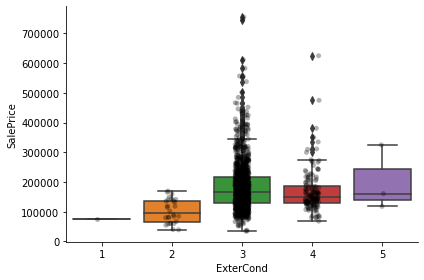

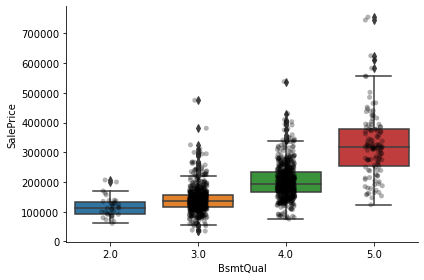

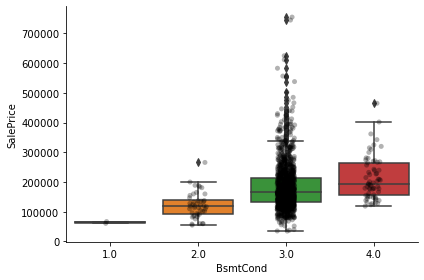

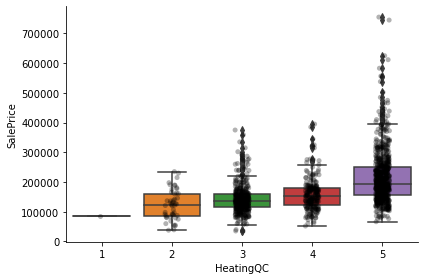

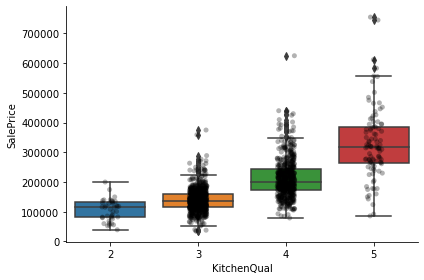

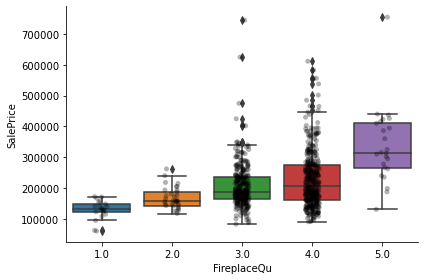

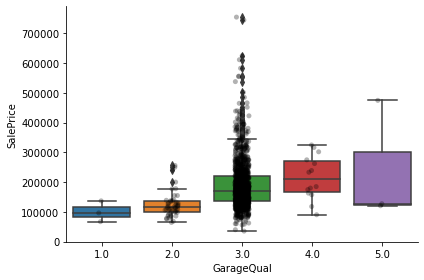

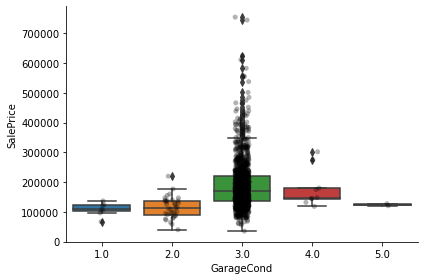

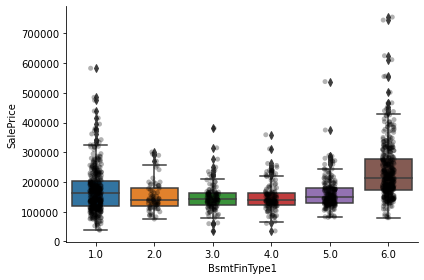

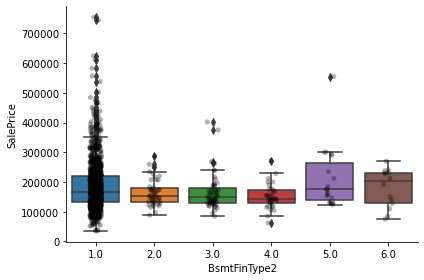

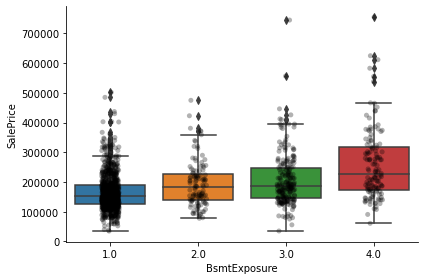

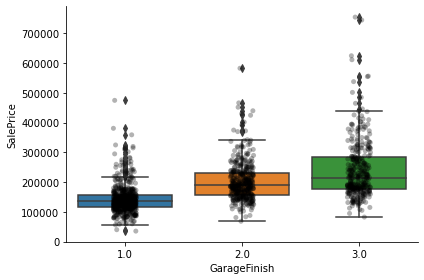

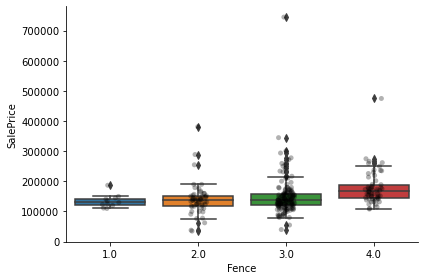

In [63]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

for var in qual_vars:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

In [64]:

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in qual_vars
]

len(cat_others)

30

In [65]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

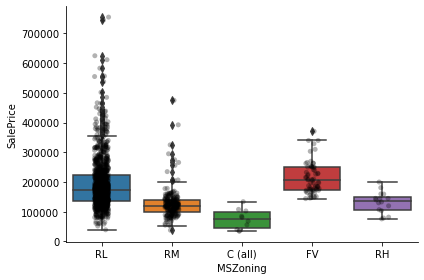

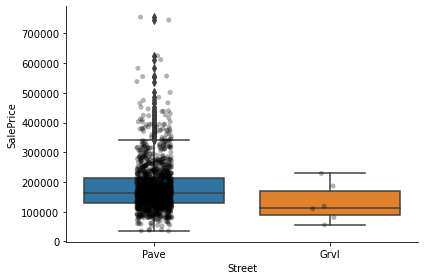

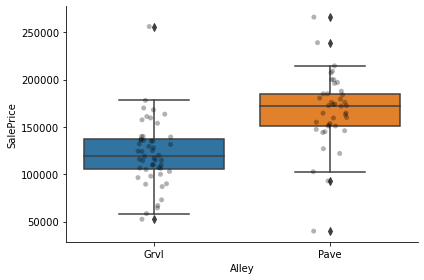

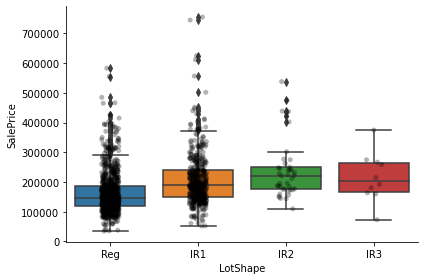

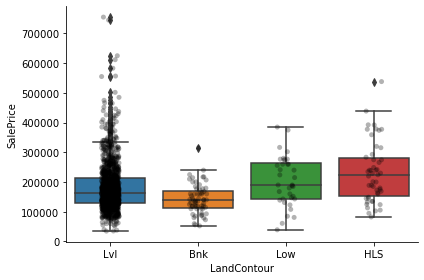

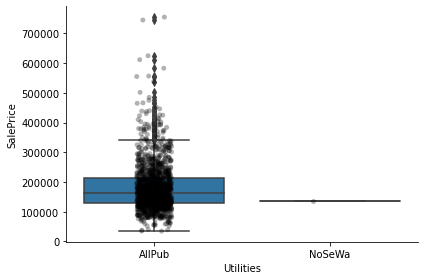

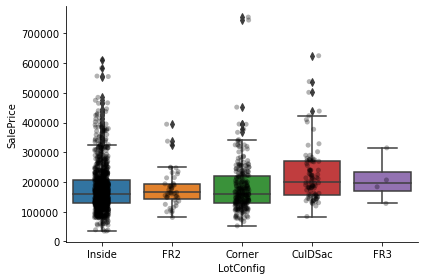

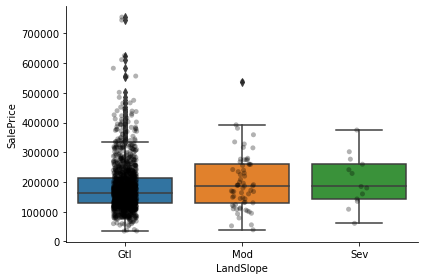

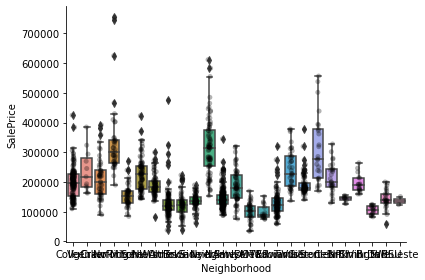

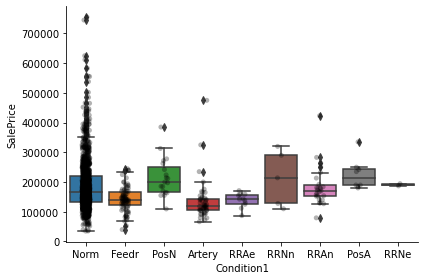

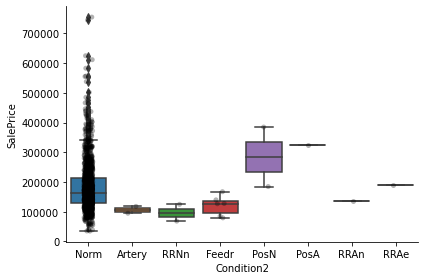

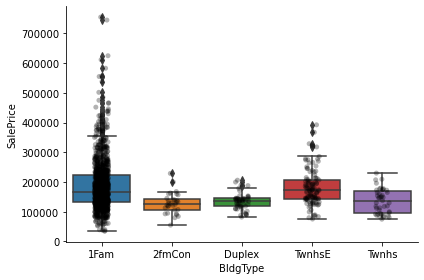

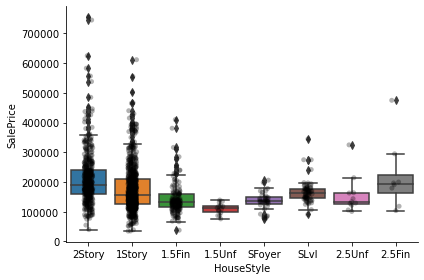

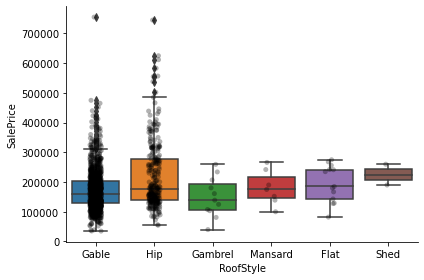

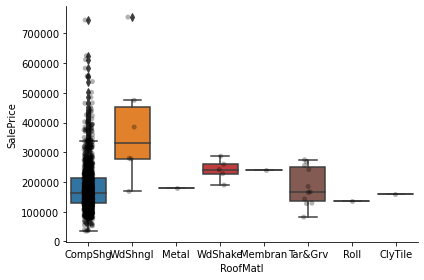

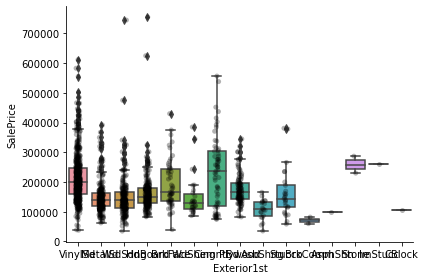

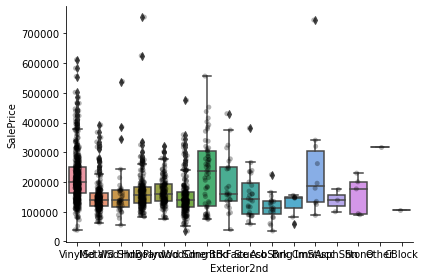

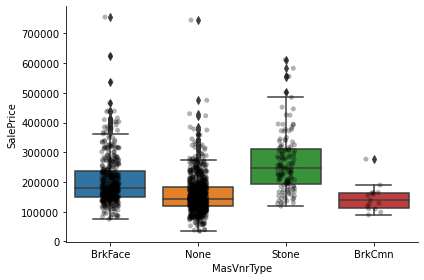

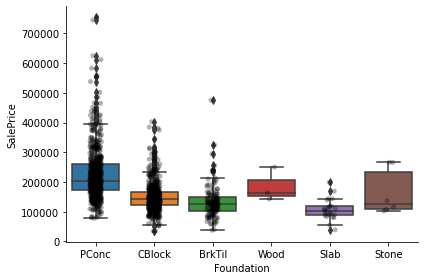

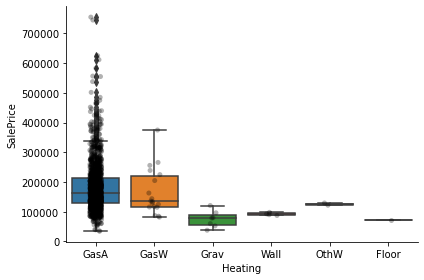

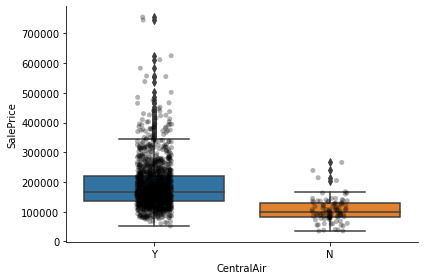

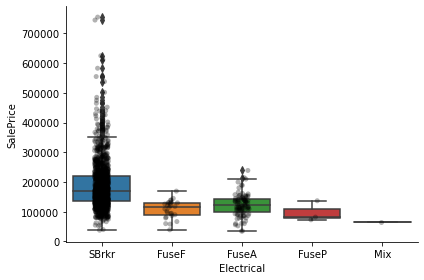

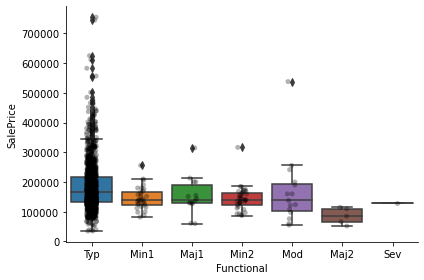

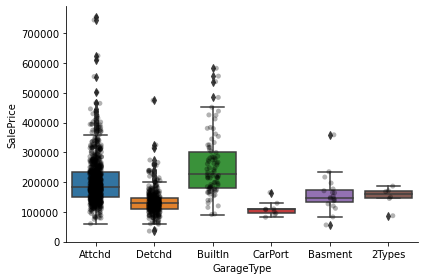

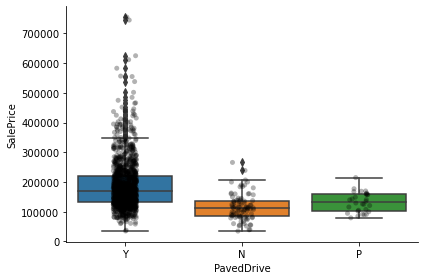

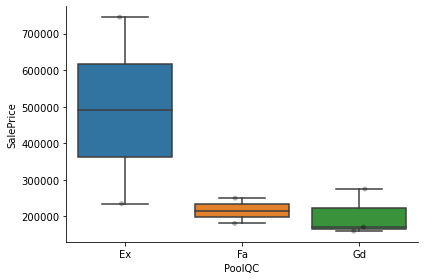

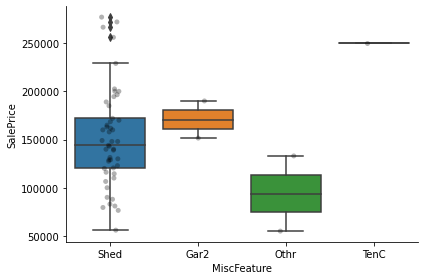

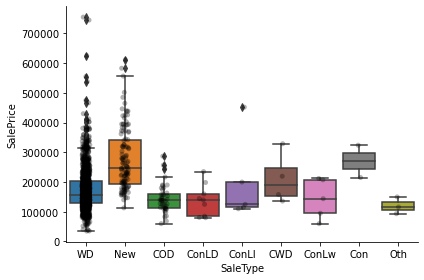

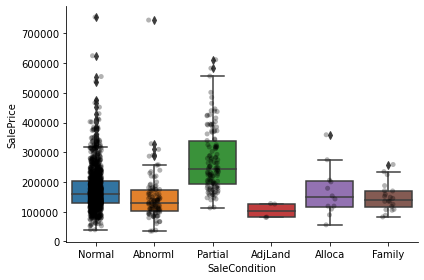

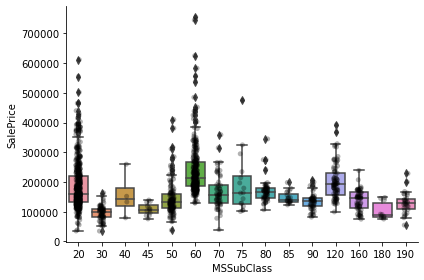

In [66]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=data, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()
